Проект принятие решений в бизнесе

План проекта:Часть 1
Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
Во второй части проекта необходимо проанализировать А/В тест согласно задания, а именно:
Построить график кумулятивной выручки по группам. Сделав выводы и предположения.
Построить график кумулятивного среднего чека по группам. Сделав выводы и предположения.
Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделав выводы и предположения.
Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделав выводы и предположения.
Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделав выводы и предположения.
Построить точечный график количества заказов по пользователям. Сделав выводы и предположения.
Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберав границу для определения аномальных пользователей.
Построить точечный график стоимостей заказов. Сделав выводы и предположения.
Посчитать 95-й и 99-й перцентили стоимости заказов. Выберав границу для определения аномальных заказов.
Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделав выводы и предположения.
Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделав выводы и предположения.
Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделав выводы и предположения.
Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделав выводы и предположения.
Принять решение по результатам теста и объяснить его,выбрав один из перечисленных:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Цель работы :
Приоритизация заранее подготовленных гипотез, запуск A/B-теста,анализ результатов.
Основными метриками нашего исследования являются средний чек и конверсия(отношение кол-ва пользователей к заказам)

In [1]:
#Импортируем библиотеки для выполнения заданий 
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Читаем csv файл с данными, присваиваем переменную data
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#Используем дополнительную настройку для отображение всего столбца с наименованием гипотезы, кол-во символов-110.
pd.options.display.max_colwidth = 110

In [4]:
#В датасете 9 гипотез, поэтому ознакомимся со всей таблицей с помощью .head(),сразу приведём название столбцов к нижнему регистру для удобства
data.columns = data.columns.str.lower()
data.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Добавим компоненты фреймворков для удобства:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
Efforts — сколько стоит протестировать эту гипотезу. 

In [5]:
#Основываясь на формулу из теории применим фреймворк ICE для приоритизации гипотез,округлив до 2 знаков после запятой, и отсортируем их по убыванию приоритета.
data['ice'] = round(data['impact']*data['confidence']/data['efforts'],2)
data[['hypothesis','ice']].sort_values(by ='ice',ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Гипотезы под номерами 8,0,7 являются наиболее приоритетными по фреймворку ice

Тройка гипотез-лидеров :
-Запустить акцию,дающую скидку на товар в день рождения
-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Рассмотрим приоритизацию гипотез с помощью фреймворка rice:

In [6]:
data['rice'] = round(data['reach']*data['impact']*data['confidence']/data['efforts'],2)
data[['hypothesis','rice']].sort_values(by ='rice',ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Применив фреймворк rice приоритизация гипотез изменилась, гипотезы под номерами 7,2,0 являются наиболее приоритетными по фреймворку rice.

Тройка лидеров гипотез по фреймворку rice :
-Добавить форму подписки на все основные страницы, чтобы собрать базу клинетов для email-рассылок
-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек
-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Объяснить разницу приоритизации гипотез между фреймворками можно тем, что фреймворк rice учитывает, на скольких пользователей повлияет изменение которое мы хотим внести, в отличии от фреймворка ice.

Переходим ко второй части нашего исследования, анализ А/В теста.

In [7]:
#Присваиваем переменные , читаем csv файлы
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
#Ознакомимся с датасетами,выведем основную информацию по ним , проверим на наличие дубликатов.
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
#Приведём столбцы с датой к dtype datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

In [15]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [16]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Исследуем датасет orders, проверим сколько пользователей попали в группу А и группу В с помощью встроенной функции библиотеки numpy

In [17]:
duplicated_orders_group = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(),orders.query('group == "B"')['visitorId'].unique())
duplicated_orders_group

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

Айди пользователей попавших в обе группы удаляем

In [18]:
orders = orders[~orders['visitorId'].isin(duplicated_orders_group)]



In [19]:
#Проверим
np.intersect1d(orders.query('group == "A"')['visitorId'].unique(),orders.query('group == "B"')['visitorId'].unique())

array([], dtype=int64)

Удалили пользователей попавших в обе группы, т.к они могут искажать результаты, предположу что оставив так как было, то по сути поменяться ничего не должно.

Объеденим обе таблицы

In [20]:
#Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Объединяем кумулятивные данные в одной таблице 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

#Переименовываем столбцы понятными названиями
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [23]:
#Пример проверки создания датафрейма
print(orders['date'].min())
print(cumulativeData['date'].min())
print(orders['date'].max())
print(cumulativeData['date'].max())

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-31 00:00:00


Построим график кумулятивной выручки по группам. С помощью функций библиотеки matplotlib 

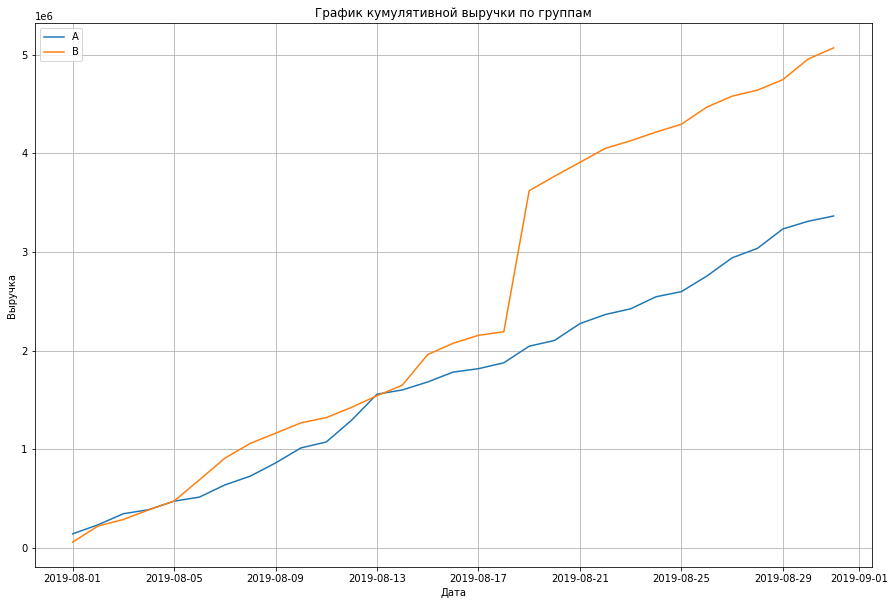

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 10))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()


Выручка примерно одинаково увеличивается, но в какой-то момент группа B резко растёт, это может свидетельствовать о всплеске количества продаж или повышения стоимости покупок.

 Построим график кумулятивного среднего чека по группам.

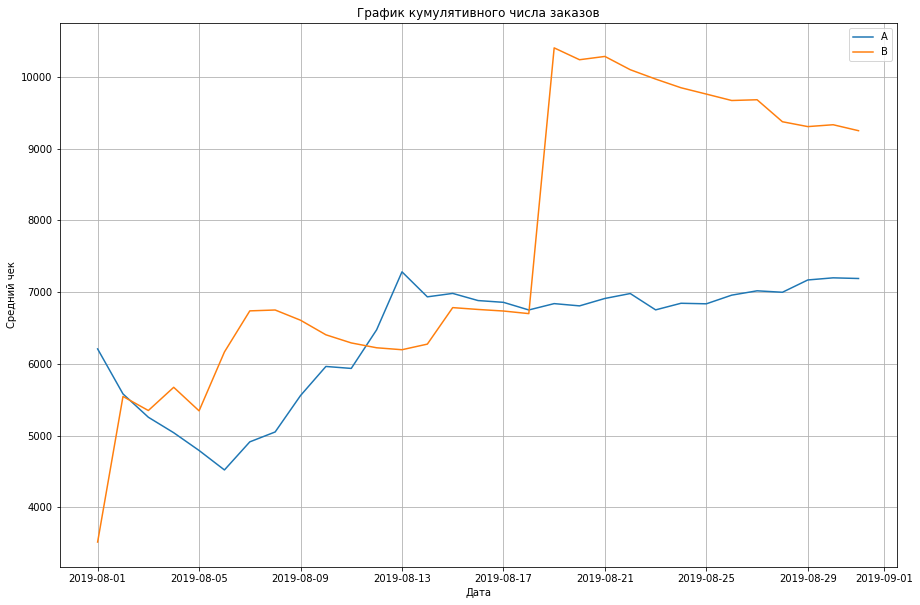

In [25]:
#делим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного числа заказов')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend()
plt.show()


Видны резкие скачки в обоих группах , особенно на графике выделяются скачки в группе В, объяснить это можно тем , что в данный момент времени в группы попадали очень крупные заказы.
Также можно обратить внимание что скачок среднего чека совпадает с качком выручки по дате, примерно 18.08.2019года...

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() 
горизонтальная линия поперек оси

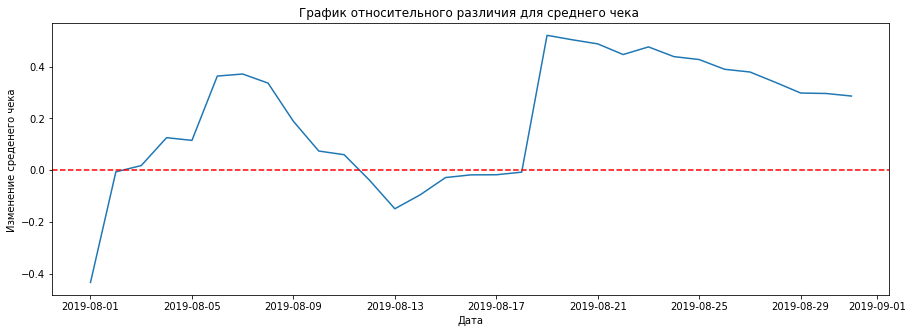

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного различия для среднего чека ')
plt.xlabel('Дата')
plt.ylabel('Изменение среденего чека ')
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--') 

Резкие скачки на графике могут быть вызваны выбросами и "дорогими" заказами.

Построим график кумулятивного среднего количества заказов на посетителя по группам

(18109.0, 18140.0, 0.0, 0.1)

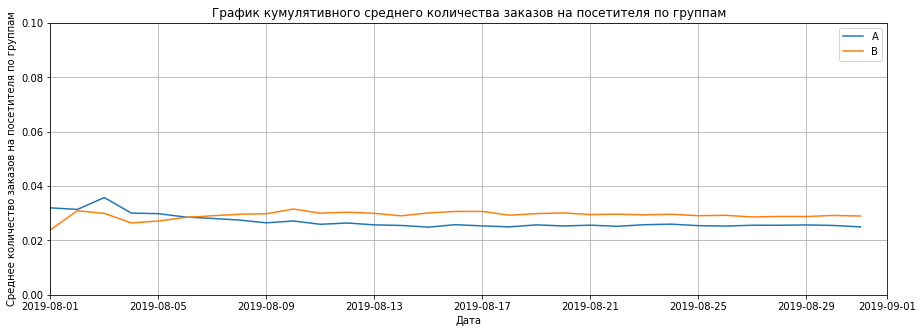

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя по группам')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.1])

По графику видно, что в начале месяца группа А было впереди по среднему количеству заказов на посетителя, затем группа В вышла вперёд и до конца месяца двигались семмитрично,стабильно,без резких изменений.

Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Text(0, 0.5, 'Среднее количество заказов на посетителя группы В к группе А')

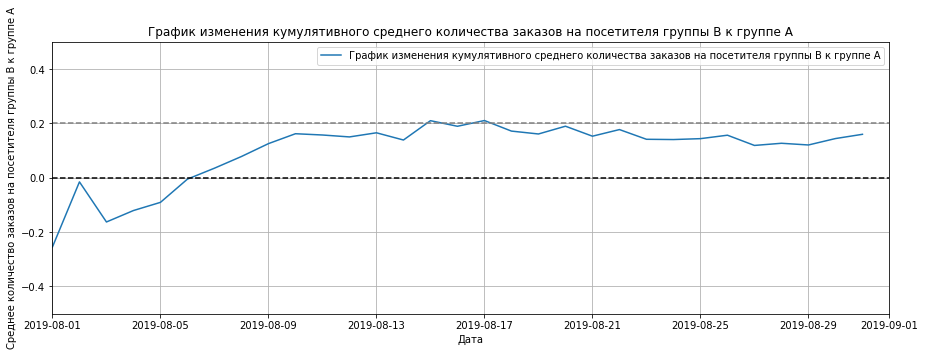

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="График изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.title('График изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя группы В к группе А')

Cреднее количество заказов на посетителя группы В проигрывала группе А в начале месяца, с 6 августа группа В вырвалось вперёд и стабильно лидирует.

Построим точечный график количества заказов по пользователям

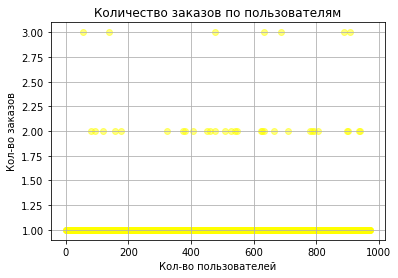

In [29]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns =  ['user_id', 'orders']
x_values = pd.Series(range(0,len(orders_by_users)))
# Строим диаграмму для наглядности

plt.scatter(x_values, orders_by_users['orders'], color='yellow', alpha=0.5)
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.grid()
plt.show()

Подавляющее число пользователей совершили лишь 1 заказ, значительно меньше пользователей соверишили 2 заказа, 3 раза пользователь совершает заказ весьма редко , что впринцепе ожидаемо и предсказуемо.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выбрав границу для определения аномальных пользователей.

In [30]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

Основываясь на данный метод мы можем предположить , что заказы пользователей совершивших 3 заказа являются аномальными.

 Построим точечный график стоимостей заказов

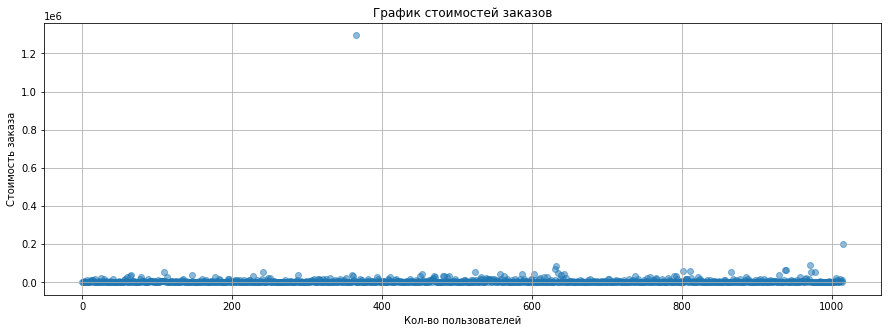

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue'], alpha=0.5)

На графике мы видим аномальную стоимость заказа более 1.2млн.На графике видна граница аномалий, выше 200т.р.так как остальные заказы находятся примерно в одном поле. Добавим условие меньше 0.2 ,удалив аномалии.

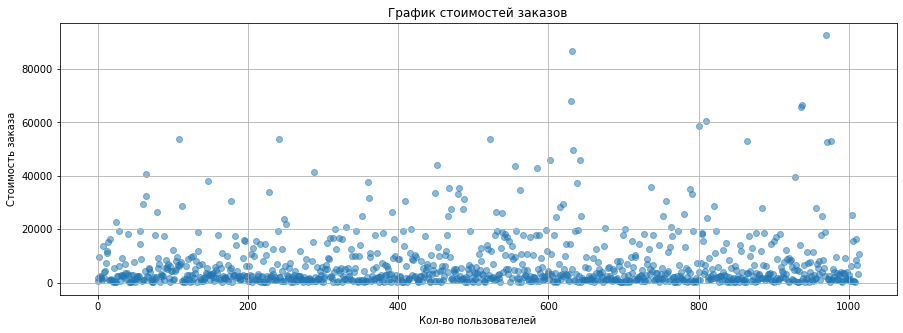

In [32]:
not_anomal_orders = orders[orders['revenue']<200000]['revenue']
xn_values = pd.Series(range(0,len(not_anomal_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость заказа')
plt.scatter(xn_values, not_anomal_orders, alpha=0.5);

Мы удалили аномальные заказы, для того чтобы дальше в исследовании сравнить "сырые данные" с данными без аномалий.

 Посчитаем 95-й и 99-й перцентили стоимости заказов

In [33]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Теперь мы видим, что всё что дороже 53904 можно считать аномальным, т.к эти значения являются одним процентом от ста.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Создадим общую таблицу с данными по заказам и визитами с кумулятивными показателями

In [34]:
#Подготовка
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

названия столбцов данных:
date — дата;
ordersPerDateA — количество заказов в выбранную дату в группе A;
revenuePerDateA — суммарная выручка в выбранную дату в группе A;
ordersPerDateB — количество заказов в выбранную дату в группе B;
revenuePerDateB — суммарная выручка в выбранную дату в группе B;
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
visitorsPerDateA — количество пользователей в выбранную дату в группе A;
visitorsPerDateB — количество пользователей в выбранную дату в группе B;
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

В результате мы имеем общую таблицу с данными по заказам и визитами с кумулятивными показателями.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [35]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлив до трёх знаков после запятой.

Нулевой гипотезой будет отсутствие значимых различий
альтернативная гипотеза - присутствие значимых различий

In [37]:
print('p-value = '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('различие в среднем количестве заказов на посетителя между группами (В к А ) = '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
различие в среднем количестве заказов на посетителя между группами (В к А ) = 0.160


Первое число — p-value = 0.011, что меньше 0,05 ,поэтому нулевую гипотезу , отсутствия значимых различий - отвергаем.
Второе число - различие в среднем количестве заказов на посетителя между группами (В к А 16%)

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевой гипотезой будет отсутствие различий в среднем чеке между группами
альтернативная гипотеза - присутствие значимых различий в среднем чеке между группами

In [38]:
print("p-value = "'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("разница в процентах среднего чека группы В к А = "'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
разница в процентах среднего чека группы В к А = 0.287


Первое число - p-value = 0.829 , что больше 0,05, поэтому нулевую гипотезу отсутствия различий мы отвергнуть не можем, значимых разлчий нет.
0.287 это разница в процентах среднего чека группы В к А (28.7%)

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

 Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 20000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [39]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
print("Количество  аномальных пользователей :" ,len(abnormalUsers)) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64

Количество  аномальных пользователей : 16


Всего 16 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста

In [38]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                            pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Далее применим статистический критерий Манна-Уитни к полученным выборкам:

In [39]:
print("p-value = "'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("разница в процентах среднего чека группы В к А = "'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.007
разница в процентах среднего чека группы В к А = 0.189


Гипотезы уже заданы, сравним результаты (очищенных данных от сырых)
Первое число — p-value = 0.007, что меньше 0,05 ,поэтому нулевую гипотезу , отсутствия значимых различий - отвергаем.
Второе число - различие в среднем количестве заказов на посетителя между группами (В к А 18,9%)
Соответственно очищенные и сырые данные имеют значимые различия в среднем количестве заказов


Теперь проверим и сравним очищенные данные по среднему чеку между группами

In [40]:

print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Отношение В к А = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value = 0.788
Отношение В к А = -0.032


Гипотезы уже заданы, сравним результаты (очищенных данных от сырых) Первое число — p-value =  0.788 , что больше 0.05 , значимых различий нет, как и в случае с "сырыми данными".\
Разница в процентах среднего чека группы В к А (28.7%) у сырых данных и -3% у очищенных данных, можно сказать что аномальные значения среднего чека сильно сыграло на результаты.


 Принять решение по результатам теста и объяснить его,выбрав один из перечисленных:

Остановить тест, зафиксировать победу одной из групп.
Остановить тест, зафиксировать отсутствие различий между группами.
Продолжить тест.

По результатам исследования предлагаю остановиться на первом варианте, зафиксировать победу группы В т.к. показатели кумулятивной выручки и показатели кумулятивн